In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-72.26242849834279 155.05227086562024
-39.30700119584396 -111.53169488031186
15.681665375973793 -10.562101400187828
64.25828436487018 10.543978721491612
11.347179275930998 111.36526235735408
74.23595832362304 -6.5019602756609345
-72.48774215960245 7.483919360803043
-18.36823931297934 -144.22405623031315
88.85451944683956 -160.84004088202795
-27.171493261308427 148.30205209578776
-8.501060042244859 79.03148150412426
-88.72503267822009 -163.50126129429026
-23.000605861674075 -146.19481159942566
-14.592798504612759 26.56182030328992
-50.7244570849509 43.874382884551636
-54.79522014631496 20.08660046503698
-76.38853114299282 86.95010853911276
55.32291184922653 162.67618794389085
-82.31388832442519 26.8455761728637
-6.015168897431252 -155.35996822477384
30.20826650308146 5.779358954779269
-42.83794580567402 20.382135541690417
-23.514652932367127 -106.98355985687793
-16.136832451903445 102.41094975658115
-10.22311696887705 -33.533183364674585
-41.86490713756213 156.02016155377254
-32.6190817

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | nioro
Processing Record 4 of Set 1 | a
City not found. Skipping...
Processing Record 5 of Set 1 | cam ranh
Processing Record 6 of Set 1 | klaksvik
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | tautira
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | roma
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | mumbwa
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | ust-kamchatsk
City not found. Skipping...
Processing Record 18 of Set 1 | faanui
Processing Record 19 of Set 1 | warqla
City not found. Skipping...
Processing Record 20 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 21 of Set 

Processing Record 35 of Set 4 | namatanai
Processing Record 36 of Set 4 | tuktoyaktuk
Processing Record 37 of Set 4 | coihaique
Processing Record 38 of Set 4 | humboldt
Processing Record 39 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 40 of Set 4 | wanning
Processing Record 41 of Set 4 | vila franca do campo
Processing Record 42 of Set 4 | cherskiy
Processing Record 43 of Set 4 | sabha
Processing Record 44 of Set 4 | praia
Processing Record 45 of Set 4 | changzhou
Processing Record 46 of Set 4 | bonavista
Processing Record 47 of Set 4 | portland
Processing Record 48 of Set 4 | margate
Processing Record 49 of Set 4 | kerman
Processing Record 50 of Set 4 | virginia beach
Processing Record 1 of Set 5 | talnakh
Processing Record 2 of Set 5 | kapaa
Processing Record 3 of Set 5 | ufimskiy
Processing Record 4 of Set 5 | pevek
Processing Record 5 of Set 5 | araouane
Processing Record 6 of Set 5 | vila velha
Processing Record 7 of Set 5 | vozhega
Processing Record 8 of S

Processing Record 23 of Set 8 | te anau
Processing Record 24 of Set 8 | chala
Processing Record 25 of Set 8 | youkounkoun
Processing Record 26 of Set 8 | safaga
Processing Record 27 of Set 8 | vysokogornyy
Processing Record 28 of Set 8 | sayanogorsk
Processing Record 29 of Set 8 | boo
Processing Record 30 of Set 8 | nadym
Processing Record 31 of Set 8 | flinders
Processing Record 32 of Set 8 | taybad
Processing Record 33 of Set 8 | guajara-mirim
City not found. Skipping...
Processing Record 34 of Set 8 | hajnowka
Processing Record 35 of Set 8 | monrovia
Processing Record 36 of Set 8 | baft
Processing Record 37 of Set 8 | severo-kurilsk
Processing Record 38 of Set 8 | oranjemund
Processing Record 39 of Set 8 | batsfjord
Processing Record 40 of Set 8 | novoagansk
Processing Record 41 of Set 8 | san cristobal
Processing Record 42 of Set 8 | yaan
Processing Record 43 of Set 8 | mount gambier
Processing Record 44 of Set 8 | hami
Processing Record 45 of Set 8 | buariki
City not found. Skippi

Processing Record 10 of Set 12 | khash
Processing Record 11 of Set 12 | inirida
Processing Record 12 of Set 12 | shingu
Processing Record 13 of Set 12 | longyearbyen
Processing Record 14 of Set 12 | trincomalee
Processing Record 15 of Set 12 | sistranda
Processing Record 16 of Set 12 | marawi
Processing Record 17 of Set 12 | yauya
Processing Record 18 of Set 12 | rongcheng
Processing Record 19 of Set 12 | faya
Processing Record 20 of Set 12 | palasa
Processing Record 21 of Set 12 | valparaiso
Processing Record 22 of Set 12 | lermontovka
Processing Record 23 of Set 12 | coracora
Processing Record 24 of Set 12 | beringovskiy
Processing Record 25 of Set 12 | medicine hat
Processing Record 26 of Set 12 | crab hill
City not found. Skipping...
Processing Record 27 of Set 12 | uralets
Processing Record 28 of Set 12 | eureka
Processing Record 29 of Set 12 | lorengau
Processing Record 30 of Set 12 | yarensk
Processing Record 31 of Set 12 | saldanha
Processing Record 32 of Set 12 | troitsko-pech

In [11]:
len(city_data)

564

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed" ]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2022-11-20 06:27:23,-46.6000,168.3333,58.80,90,67,11.86
1,Rikitea,PF,2022-11-20 06:27:23,-23.1203,-134.9692,71.89,67,100,7.85
2,Nioro,GM,2022-11-20 06:27:23,13.3500,-15.7500,66.33,17,73,6.20
3,Cam Ranh,VN,2022-11-20 06:27:24,11.9214,109.1591,76.96,94,75,9.22
4,Klaksvik,FO,2022-11-20 06:27:24,62.2266,-6.5890,45.52,93,100,41.85
5,Hermanus,ZA,2022-11-20 06:27:25,-34.4187,19.2345,65.80,66,23,4.32
6,Tautira,PF,2022-11-20 06:27:25,-17.7333,-149.1500,75.79,81,100,11.27
7,Barrow,US,2022-11-20 06:27:25,71.2906,-156.7887,19.42,93,100,18.41
8,Roma,US,2022-11-20 06:25:05,43.2128,-75.4557,31.37,60,100,11.50
9,Hithadhoo,MV,2022-11-20 06:27:26,-0.6000,73.0833,80.56,79,19,9.84


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

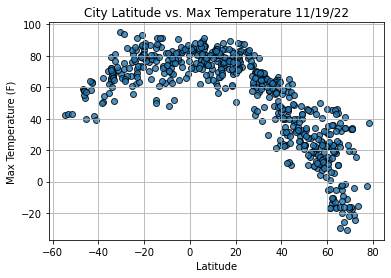

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

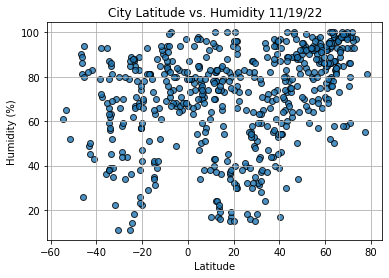

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

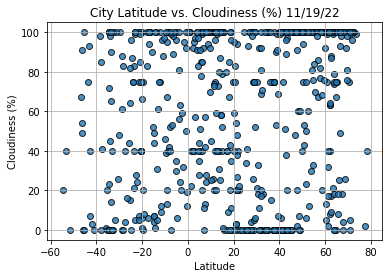

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

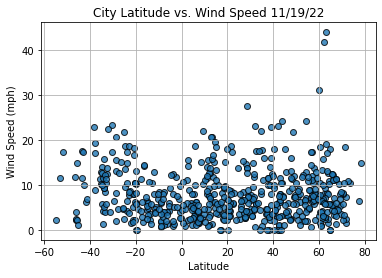

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                   Bredasdorp
Country                        ZA
Date          2022-11-20 06:27:28
Lat                      -34.5322
Lng                       20.0403
Max Temp                     63.7
Humidity                       59
Cloudiness                     72
Wind Speed                   1.28
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
559     True
560     True
561    False
562     True
563     True
Name: Lat, Length: 564, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Nioro,GM,2022-11-20 06:27:23,13.3500,-15.7500,66.33,17,73,6.20
3,Cam Ranh,VN,2022-11-20 06:27:24,11.9214,109.1591,76.96,94,75,9.22
4,Klaksvik,FO,2022-11-20 06:27:24,62.2266,-6.5890,45.52,93,100,41.85
7,Barrow,US,2022-11-20 06:27:25,71.2906,-156.7887,19.42,93,100,18.41
8,Roma,US,2022-11-20 06:25:05,43.2128,-75.4557,31.37,60,100,11.50


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

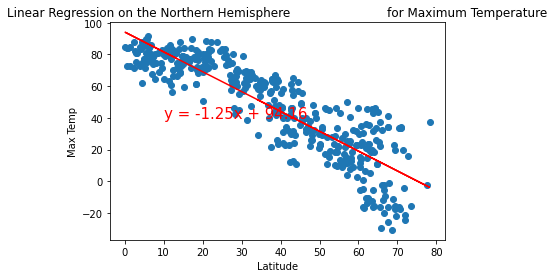

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

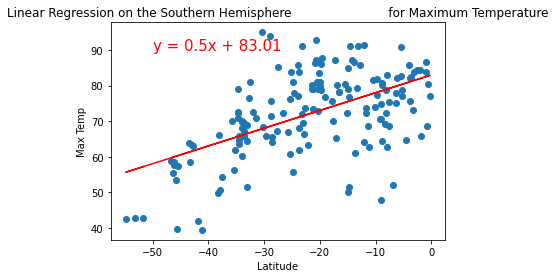

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

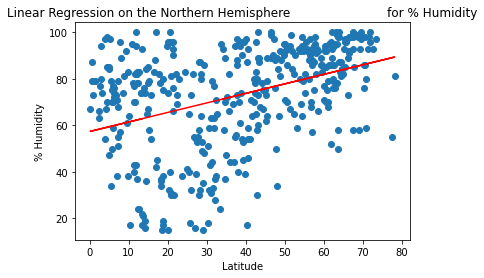

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

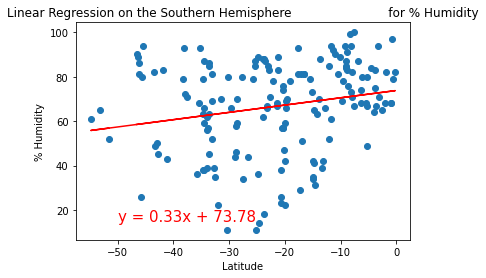

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

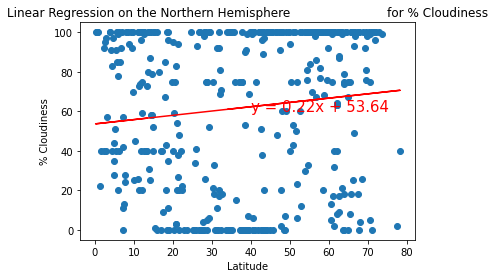

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,60))

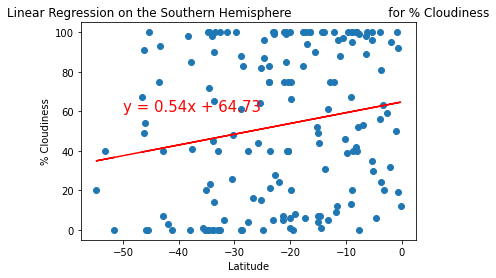

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

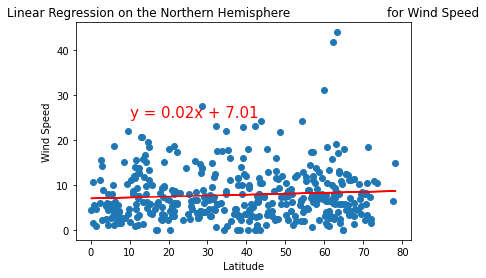

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,25))

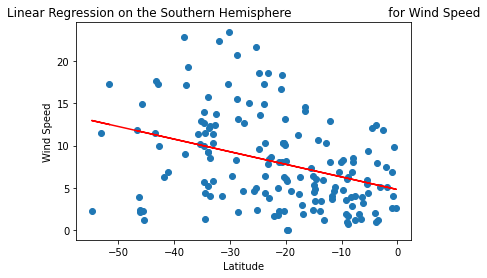

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,27))